In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 6)
import librosa, IPython.display as ipd, time, keras, numpy
from scipy.special import expit


In [2]:
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

[&larr; Back to Index](index.html)

# Neural Networks

Neural networks are a category of machine learning models which have seen a resurgence since 2006. *Deep learning* is the recent area of machine learning which combines many neuron layers (e.g. 20, 50, or more) to form a "deep" neural network. In doing so, a deep neural network can accomplish sophisticated classification tasks that classical machine learning models would find difficult.

## Keras

Keras is a Python package for deep learning which provides an easy-to-use layer of abstraction on top of Theano and Tensorflow.

Import Keras objects:

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow.keras.optimizers

Create a neural network architecture by layering neurons. Define the number of neurons in each layer and their activation functions:

In [4]:
model = Sequential()
model.add(Dense(4, activation='relu', input_dim=2))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

Choose the optimizer, i.e. the update rule that the neural network will use to train:

In [5]:
optimizer = tensorflow.keras.optimizers.legacy.SGD(decay=0.001, momentum=0.99)

Compile the model, i.e. create the low-level code that the CPU or GPU will actually use for its calculations during training and testing:

In [6]:
model.compile(loss='binary_crossentropy', optimizer=optimizer)

## Example: XOR

The operation XOR is defined as: `XOR(x, y) = 1 if x != y else 0`

Synthesize training data for the XOR problem.

In [7]:
X_train = numpy.random.randn(10000, 2)
print(X_train.shape)

(10000, 2)


In [8]:
print(X_train[:5])

[[-2.56662407  0.36291399]
 [ 0.98970741  0.91651877]
 [ 0.64052502  0.71333087]
 [-0.47347115  1.40069065]
 [ 0.88173813 -2.0014587 ]]


Create target labels for the training data.

In [9]:
y_train = numpy.array([
    [float(x[0]*x[1] > 0), float(x[0]*x[1] <= 0)]
    for x in X_train
])
print(y_train.shape)

(10000, 2)


In [10]:
y_train[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

Plot the training data:

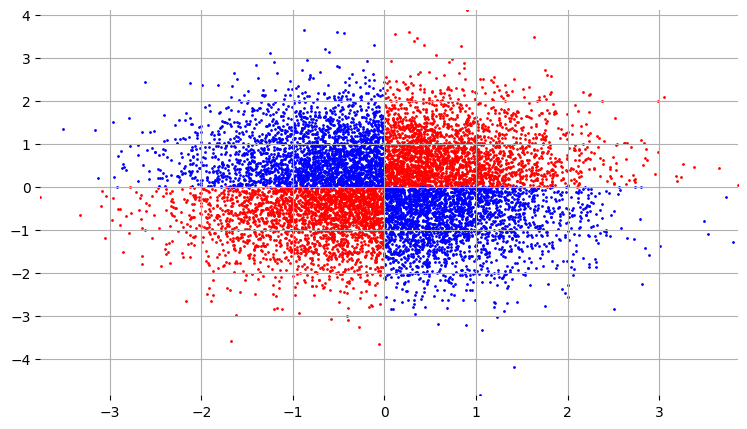

In [11]:
plt.figure(figsize=(9, 5))
plt.scatter(X_train[y_train[:,0]>0.5,0], X_train[y_train[:,0]>0.5,1], c='r', s=1)
plt.scatter(X_train[y_train[:,1]>0.5,0], X_train[y_train[:,1]>0.5,1], c='b', s=1);

Finally, train the model!

In [12]:
results = model.fit(X_train, y_train, epochs=200, batch_size=100)

Epoch 1/200
100/100 [==============================] - 0s 472us/step - loss: 0.6786
Epoch 2/200
100/100 [==============================] - 0s 401us/step - loss: 0.5446
Epoch 3/200
100/100 [==============================] - 0s 393us/step - loss: 0.4157
Epoch 4/200
100/100 [==============================] - 0s 393us/step - loss: 0.3824
Epoch 5/200
100/100 [==============================] - 0s 395us/step - loss: 0.3696
Epoch 6/200
100/100 [==============================] - 0s 386us/step - loss: 0.3682
Epoch 7/200
100/100 [==============================] - 0s 373us/step - loss: 0.3747
Epoch 8/200
100/100 [==============================] - 0s 382us/step - loss: 0.3744
Epoch 9/200
100/100 [==============================] - 0s 388us/step - loss: 0.3846
Epoch 10/200
100/100 [==============================] - 0s 389us/step - loss: 0.3936
Epoch 11/200
100/100 [==============================] - 0s 387us/step - loss: 0.3757
Epoch 12/200
100/100 [==============================] - 0s 379us/step - lo

Plot the loss function as a function of the training iteration number:

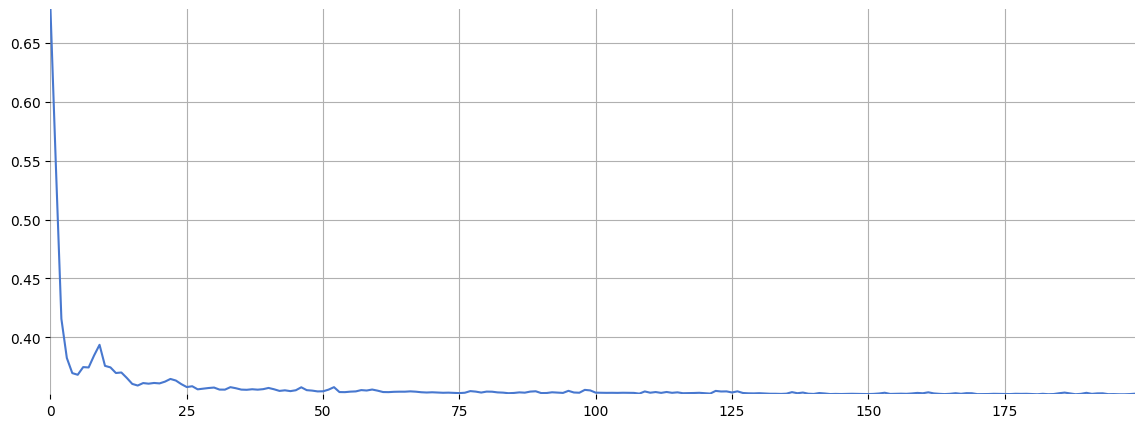

In [13]:
plt.plot(results.history['loss']);

Create test data:

In [14]:
X_test = numpy.random.randn(5000, 2)

Use the trained neural network to make predictions from the test data:

In [15]:
y_test = model.predict(X_test)

157/157 [==============================] - 0s 350us/step


In [16]:
y_test.shape

(5000, 2)

Let's see if it worked:

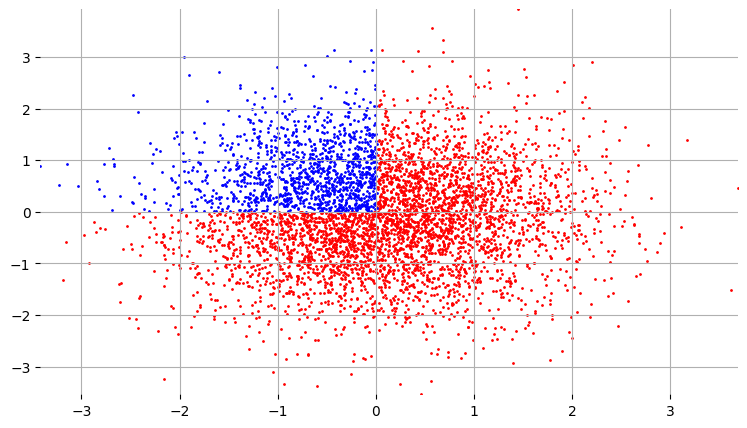

In [17]:
plt.figure(figsize=(9, 5))
plt.scatter(X_test[y_test[:, 0] > 0.5,0], X_test[y_test[:, 0] > 0.5,1], c='r', s=1)
plt.scatter(X_test[y_test[:, 1] > 0.5,0], X_test[y_test[:, 1] > 0.5,1], c='b', s=1);

[&larr; Back to Index](index.html)